###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Need for Pre-processing:</span>

A large amount of text data is available in different forms. E.g. e-books, e-magazines, online newspapers, blogs, tweets, online product review, emails, medical reports and so on. The general goal of text analysis is to provide understanding of the text without having a human to read it. This is where syntax and semantics comes into picture. Syntax refers to the structure of the language or the grammer rules and semantics is the meaning of individual words. Text processing is required to capture both semantics and syntax.

Few reasons:<br/>

- Inconsistent results from the NLP applications can be minimized if we use right kind of preprocessing on text.
- One type of pre-processing may not be suitable for other, so it's task dependent.
- Let’s say you are trying to discover commonly used words in a news dataset. If your pre-processing step involves removing stop words because some other task used it, then you are probably going to miss out on some of the common words as you have ALREADY eliminated it. So really, it’s not a one-size-fits-all approach.



###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Dataset </span>

#Data Set Information & Context:

##Tweets from Donald Trump between 2009 and 2020.

- The data has got Content , Date, Nu. of Retweet, No. of Favorites, column of the tweets.
- The data has got  pre labelled sentiment(Positive and negative) column for each content of tweets.
- We will be  exploring and analyzing  relevant columns of the data.
- We will be applying all necessary text pre processing steps on content column of the tweet data.

Data Content:


- **id**: Unique tweet id

- **link**: Link to tweet

- **content**: Text of tweet

- **date**: Date of tweet

- **retweets**: Number of retweets

- **favorites**: Number of favorites

- **mentions**: Accounts mentioned in tweet

- **Sentiment**: Sentiment of each tweet in the content column


###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Basic Task in Text Preprocessing </span>

- There are different ways to preprocess your text. Here are some of the approaches that you should know about and I will highlight the importance of each.

General Approaches:
- HTML tag removal / http link removal
- Case Normalization
- Accented word removal
- Contraction removal
- Language check
- Regular expression removal
- Stopwords removal
- Lemmatisation
- Tokenization

In [1]:
# Import necessary libraries.
# re - Regular Expression modeule
import re, string, unicodedata
import pandas as pd
import nltk           # Natural language processing tool-kit

# nltk.download('punkt') # Punkt Sentence Tokenizer.
# nltk.download('stopwords')
# nltk.download('wordnet') #Word Net Lemmatizer

# !pip install contractions
# !conda install contractions
import contractions


from bs4 import BeautifulSoup                 # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [2]:
# Load dataset.
dataset = pd.read_csv('trump_tweets.csv')

In [3]:
# Chect first 2 rows of data.
dataset.head(2)

,Unnamed: 0,id,link,content,date,retweets,favorites,mentions,hashtags,geo,Sentiment
0,0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN,positive
1,1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN,positive


In [4]:
# Here we are going to deal with text data, so we seperate out the text column in a new dataframe: data
data = dataset.drop(['Unnamed: 0', 'id', 'link', 'mentions', 'hashtags', 'geo'], axis=1)

In [5]:
# Check first 5 rows of dataframe.
data.head()

,content,date,retweets,favorites,Sentiment
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,positive
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,positive
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,positive
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,positive
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,positive


In [6]:
data['Sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [7]:
# First row of data.
pd.set_option('display.max_colwidth', None) # It will enable the entire row visible with truncation of the text. (We can see full text.)
data.loc[[0]]

,content,date,retweets,favorites,Sentiment
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 20:54:25,500,868,positive


In [8]:
data.isnull().sum()

content      0
date         0
retweets     0
favorites    0
Sentiment    0
dtype: int64

In [9]:
data["date"] = pd.to_datetime(data["date"])

data.head()

,content,date,retweets,favorites,Sentiment
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 20:54:25,500,868,positive
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-05 03:00:10,33,273,positive
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08 15:38:08,12,18,positive
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08 22:40:15,11,24,positive
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12 16:07:28,1399,1965,positive


In [10]:
# Extracting registration year from the date
data["TweetYr"] = data["date"].apply(lambda x: x.year)
data["TweetMth"] = data["date"].apply(lambda x: x.month)

data.head()

,content,date,retweets,favorites,Sentiment,TweetYr,TweetMth
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 20:54:25,500,868,positive,2009,5
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-05 03:00:10,33,273,positive,2009,5
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08 15:38:08,12,18,positive,2009,5
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08 22:40:15,11,24,positive,2009,5
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12 16:07:28,1399,1965,positive,2009,5


In [11]:
print(data["TweetYr"].value_counts().sort_index())

print()

print("-"*60)

print(data["TweetMth"].value_counts().sort_index())

2009      56
2010     143
2011     870
2012    4190
2013    8207
2014    5987
2015    7719
2016    3951
2017    2232
2018    2998
2019    4588
2020     181
Name: TweetYr, dtype: int64

------------------------------------------------------------
1     3864
2     2978
3     2898
4     3438
5     3317
6     3149
7     3676
8     3148
9     3410
10    4508
11    3339
12    3397
Name: TweetMth, dtype: int64


In [14]:
data["content"].mode()

0    MAKE AMERICA GREAT AGAIN!
dtype: object

In [17]:
data.shape

(41122, 7)

In [16]:
data[data['content']=="MAKE AMERICA GREAT AGAIN!"].shape

(33, 7)

In [18]:
data['content'].nunique()

40909

###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> HTML Link Removal using Regular Expression </span>

A regular expression is a set of symbols that describes a text pattern. Regular expressions are useful in finding, replacing, and extracting information from text, html and xml files.

* <font color="red">[0-9]</font> Matches a single digit
* <font color="red">[a-z0-9]</font> Matches a single character that must be a lower case letter or a digit.
* <font color="red">[A-Za-z]</font> Matches a single character that much be a upper/lower case letter 
* <font color="red">\d</font> Matches any decimal digit; equivalent to the set [0-9].
* <font color="red">\D</font> Matches characters that are not digits, which is equivalent to [^0-9] or [^\d].
* <font color="red">\w</font> Matches any alphanumeric character, which is equivalent to [a-zA-Z0-9].
* <font color="red">\W</font> Matches any non-alphanumeric character; which is equivalent to [^a-zA-Z0-9] or [^\w].
* <font color="red">\s</font> Matches any whitespace character; which is equivalent to [\t\n\r\f\v], where \t indicates taps, \n  line feeds, \r carriage returns, \f form feeds and \v vertical tabs.
* <font color="red">\S:</font> Matches any non-whitespace character; which is equivalent to  [^ \t\n\r\f\v].
* <font color="red">ˆ</font> Matches the start of the line.
* <font color="red">$</font> Matches the end of the line.
* <font color="red">.</font> Matches any character (a wildcard).
* <font color="red">*</font> Matches when the preceding character occurs zero or more times
* <font color="red">?</font> Matches when the preceding character occurs zero or one times
* <font color="red">+</font> Matches when the preceding character occurs one or more times

More information can be found here :
https://docs.python.org/2/library/re.html

###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Example </span>


In [29]:
string="Uchenna had a good question on how 2 deal w mi78ssing values. The question is gr8"

str1 = re.findall(r'mi\d+', string)

print(str1)

['mi78']


In [25]:
string="Uchenna had a good question on how 2 deal w mi78ssi98ng values. The question is gr8. + returns a consecutive set of digits till a non digit character is encontered"

str1 = re.findall(r'\d+', string)

print(str1)

['2', '78', '98', '8']


In [30]:
string='Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference http://t.co/Ge9Lp7hpyG works fine'

print(string)

Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference http://t.co/Ge9Lp7hpyG works fine


In [36]:
str1 = re.findall(r'http\S+', string)

print(str1)

['http://t.co/Ge9Lp7hpyG']


In [37]:
str1 = re.findall(r'http\S+', 'Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference http://t.co/Ge9Lp7hpyG works fine')

print('Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference http://t.co/Ge9Lp7hpyG works fine')

print("---------------Output-----------------------")

print (str1)

Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference http://t.co/Ge9Lp7hpyG works fine
---------------Output-----------------------
['http://t.co/Ge9Lp7hpyG']


In [38]:
str_tweet=data.at[3, "content"]

print(str_tweet)

str1=re.findall(r'http\S+', str_tweet)

print("---------------Output-----------------------")
print (str1)

New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e
---------------Output-----------------------
['http://tinyurl.com/qlux5e']


In [39]:
data.at[0,'content'] #o is the row index (record number), column name

'Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!'

In [40]:
# Removal of the http link using Regular Expression.

for i, row in data.iterrows():

    #     print(i,row)
    
    clean_text = re.sub(r"http\S+", "", data.at[i, 'content']) #--Extracting anything that follows http till a space is encountered
    
    data.at[i,'text'] = clean_text #---Puts the cleaned text back to the data frame
    
data.head()

,content,date,retweets,favorites,Sentiment,TweetYr,TweetMth,text
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 20:54:25,500,868,positive,2009,5,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-05 03:00:10,33,273,positive,2009,5,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08 15:38:08,12,18,positive,2009,5,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: - Very funny!
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08 22:40:15,11,24,positive,2009,5,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way:
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12 16:07:28,1399,1965,positive,2009,5,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump"


###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> HTML Tags $\text<br></br>$ </span>

In [41]:
def strip_html(text):
    
    soup = BeautifulSoup(text, "html.parser")
    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

data.head()

C:\Users\91905\anaconda3\lib\site-packages\bs4\__init__.py:314: UserWarning: "b'....'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


,content,date,retweets,favorites,Sentiment,TweetYr,TweetMth,text
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 20:54:25,500,868,positive,2009,5,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-05 03:00:10,33,273,positive,2009,5,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08 15:38:08,12,18,positive,2009,5,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: - Very funny!
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08 22:40:15,11,24,positive,2009,5,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way:
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12 16:07:28,1399,1965,positive,2009,5,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump"


###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Accented Characters Removal</span>

Words with accent marks like “latté” and “café” should be standardized to just “latte” and “cafe”, else the model treats them as separate words although they convey the same meaning.

https://pypi.org/project/Unidecode/

In [44]:
# !pip install unidecode

import unidecode

def remove_accented_chars(text):
    
    """Remove accented characters from text, e.g. café"""
    
    text = unidecode.unidecode(text)
    
    return text

data['text'] = data['text'].apply(lambda x: remove_accented_chars(x))

data.head()

,content,date,retweets,favorites,Sentiment,TweetYr,TweetMth,text
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 20:54:25,500,868,positive,2009,5,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-05 03:00:10,33,273,positive,2009,5,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08 15:38:08,12,18,positive,2009,5,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: - Very funny!
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08 22:40:15,11,24,positive,2009,5,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way:
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12 16:07:28,1399,1965,positive,2009,5,"""My persona will never be that of a wallflower - I'd rather build walls than cling to them"" --Donald J. Trump"


In [42]:
text1="latté"

text2="latte"

text1==text2

False

In [45]:
text="Words with accent marks like “latté” and “café” should be standardized to just “latte” and “cafe”, else the model treats them as separate words although they convey the same meaning."

print(remove_accented_chars(text))

Words with accent marks like "latte" and "cafe" should be standardized to just "latte" and "cafe", else the model treats them as separate words although they convey the same meaning.


###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Language Detection </span>

Since we end up using stops words and other relevant information pertaining to english dictionary only, it is good to check the language information of the text before preprocessing. langdetect supports 55 languages out of the box (ISO 639-1 codes):

https://pypi.org/project/langdetect/


!pip install -q googletrans

from googletrans import Translator

translator = Translator()

translations = clean_df[clean_df['Language']=='de']['Description'].apply(lambda x: translator.translate(x).text)

In [46]:
%%time

data_copy=data.sample(1000).copy()

from langdetect import detect

data_copy['Language'] = ""

for i, desc in enumerate(data_copy['text']):
    
    try:
        data_copy['Language'][i] = detect(desc)
    except:
        data_copy['Language'][i] = 'unknown'
    

C:\Users\91905\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\91905\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Wall time: 11.1 s


In [47]:
data_copy['Language'].value_counts()

      975
en     25
Name: Language, dtype: int64

In [48]:
data_copy[data_copy['Language']!='en'].head()

,content,date,retweets,favorites,Sentiment,TweetYr,TweetMth,text,Language
2020,I'll be on @ foxandfriends on Monday at 7:30 a.m. Always a great time.,2012-05-11 15:06:40,14,6,positive,2012,5,I'll be on @ foxandfriends on Monday at 7:30 a.m. Always a great time.,
7575,"Life always presents new opportunities you would never expect. I hosted @ WrestleMania & then I starred in one, which sold most PPVs.",2013-03-21 19:55:15,91,51,positive,2013,3,"Life always presents new opportunities you would never expect. I hosted @ WrestleMania & then I starred in one, which sold most PPVs.",
3066,Republicans should have been much tougher on Obama. Just wait until you see what Obama does to Romney at the DNC!,2012-09-01 00:36:21,265,55,positive,2012,9,Republicans should have been much tougher on Obama. Just wait until you see what Obama does to Romney at the DNC!,
15981,"Will the Benghazi terrorist use the videotape as a defense? If so, will Obama apologize to him?",2014-06-19 17:44:13,91,140,negative,2014,6,"Will the Benghazi terrorist use the videotape as a defense? If so, will Obama apologize to him?",
22292,Nobody but Donald Trump will save Israel. You are wasting your time with these politicians and political clowns. Best! # SheldonAdelson,2015-04-27 16:33:20,436,459,positive,2015,4,Nobody but Donald Trump will save Israel. You are wasting your time with these politicians and political clowns. Best! # SheldonAdelson,


###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Contractions </span>

A contraction is a shortened form of a word (or group of words) that omits certain letters or sounds. In most contractions, an apostrophe represents the missing letters. The most common contractions are made up of verbs, auxiliaries, or modals attached to other words: He would=He’d. I have=I’ve. They are=They’re. You cannot=You can’t.

In [49]:
def replace_contractions(text):
    
    """Replace contractions in string of text"""
    
    return contractions.fix(text)

In [51]:
#---------------------Call the above function using the string declared below-------------------------------------
string="I've received a good grade, they're looking forward to visiting me."
print(string)

print("-"*60)

replace_contractions(string)

I've received a good grade, they're looking forward to visiting me.
------------------------------------------------------------


'I have received a good grade, they are looking forward to visiting me.'

In [52]:
# Perform the above operation over all the rows of text column of the dataframe.

for i, row in data.iterrows():
    
#     print(i,row)
    text = data.at[i, 'text']
    clean_text = replace_contractions(text)
    data.at[i,'text'] = clean_text

data.head()

,content,date,retweets,favorites,Sentiment,TweetYr,TweetMth,text
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 20:54:25,500,868,positive,2009,5,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-05 03:00:10,33,273,positive,2009,5,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08 15:38:08,12,18,positive,2009,5,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: - Very funny!
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08 22:40:15,11,24,positive,2009,5,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way:
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12 16:07:28,1399,1965,positive,2009,5,"""My persona will never be that of a wallflower - I would rather build walls than cling to them"" --Donald J. Trump"


In [53]:
data_interim=data.copy()

###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Tokenize </span>

https://www.nltk.org/api/nltk.tokenize.html

In [70]:
string="I've received; a good's grade"
words = nltk.word_tokenize(string)
# for w in words:
#     print(w,end=" - ")

In [71]:
print(words)

['I', "'ve", 'received', ';', 'a', 'good', "'s", 'grade']


In [67]:
string= "We expect the curriculum to be good? Why not use it to the fullest."
words = nltk.sent_tokenize(string)
# for w in words:
#     print(w,end=" - ")

print(words)

['We expect the curriculum to be good?', 'Why not use it to the fullest.']


In [72]:
# Tokenize the words of whole dataframe.
for i, row in data.iterrows():
    
    text = data.at[i, 'text']
    words = nltk.word_tokenize(text)
    data.at[i,'text'] = words

data.head()

,content,date,retweets,favorites,Sentiment,TweetYr,TweetMth,text
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 20:54:25,500,868,positive,2009,5,"[Be, sure, to, tune, in, and, watch, Donald, Trump, on, Late, Night, with, David, Letterman, as, he, presents, the, Top, Ten, List, tonight, !]"
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-05 03:00:10,33,273,positive,2009,5,"[Donald, Trump, will, be, appearing, on, The, View, tomorrow, morning, to, discuss, Celebrity, Apprentice, and, his, new, book, Think, Like, A, Champion, !]"
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08 15:38:08,12,18,positive,2009,5,"[Donald, Trump, reads, Top, Ten, Financial, Tips, on, Late, Show, with, David, Letterman, :, -, Very, funny, !]"
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08 22:40:15,11,24,positive,2009,5,"[New, Blog, Post, :, Celebrity, Apprentice, Finale, and, Lessons, Learned, Along, the, Way, :]"
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12 16:07:28,1399,1965,positive,2009,5,"[``, My, persona, will, never, be, that, of, a, wallflower, -, I, would, rather, build, walls, than, cling, to, them, '', --, Donald, J., Trump]"


###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Stopwords </span>

In [76]:
# save the stopwords in a list named stopwords.
stopword = stopwords.words('english')
for word in stopword:
    print(word, end=", ")

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [77]:
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [78]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [79]:
"Angel"=="angel"

False

In [80]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Lower Case </span>

- Lowercasing ALL your text data, although commonly overlooked, is one of the simplest and most effective form of text preprocessing. It is applicable to most text mining and NLP problems and can help in cases where your dataset is not very large and significantly helps with consistency of expected output.

- An example where lowercasing is very useful is for search. Imagine, you are looking for documents containing “usa”. However, no results were showing up because “usa” was indexed as “USA”.

- An example where lowercasing may result in inaccuracy is in predicting the programming language of a source code file. The word System in Java is quite different from system in python. Lowercasing the two makes them identical, causing the classifier to lose important predictive features. While lowercasing is generally helpful, it may not be applicable for all tasks.

In [83]:
string="Angel had a good game. Matteo scored the winning goal; but Uchenna was given the, MOM"

str1=re.findall(r'[^\w\s]', string)

print(str1)

[';']


In [85]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    
    return new_words

In [86]:
remove_punctuation(["Angel", ",", ";", "had", "a"]) #List of tokens

['Angel', 'had', 'a']

###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Stop Words </span>
- Stop words are a set of commonly used words in a language.
- Examples of stop words in English are “a”, “the”, “is”, “are” and etc. The intuition behind using stop words is that, by removing low information words from text, we can focus on the important words instead.

In [81]:
word="angel"

word not in stopword


True

In [88]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopword:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [93]:
remove_stopwords(remove_punctuation(["Angel", ",", ";", "had", "a", "good", "game",".", "Matteo", "scored", "the", "goal"])) #List of tokens

['Angel', 'good', 'game', 'Matteo', 'scored', 'goal']

In [96]:
remove_stopwords(["what","are","some", "of", "the", "commonly", "used", "words"])

['commonly', 'used', 'words']

###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Stemming </span>

- Stemming is the process of reducing inflection in words (e.g. running, runs) to their root form (e.g. run). The “root” in this case may not be a real root word, but just a canonical form of the original word.

In [97]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    
    for word in words:
        
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
        
    return stems

In [125]:
%%time
print(stem_words(["what","are","some", "of", "the", "commonly", "used", "words", "referring", "to", "this", "presents"]))

['what', 'ar', 'som', 'of', 'the', 'common', 'us', 'word', 'refer', 'to', 'thi', 'pres']
Wall time: 0 ns


###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Lemmatisation </span>

- Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form.
- The only difference is that, lemmatization tries to do it the proper way.
- It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”.

https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

In [112]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word)
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

In [126]:
%%time
print(lemmatize_verbs(["what","are","some", "of", "the", "commonly", "used", "words", "referring", "to", "this", "presents"]))

['what', 'are', 'some', 'of', 'the', 'commonly', 'used', 'word', 'referring', 'to', 'this', 'present']
Wall time: 0 ns


In [120]:
# !pip install spacy
#python -m spacy download en

import spacy
# Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
nlp = spacy.load("en_core_web_sm")

In [ ]:
# class LemmaTokenizerWordnet(object):
    
#     def __init__(self):
#         self.wnl=WordNetLemmatizer()
        
#     def __call__(self,doc):
#         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
    
# class LemmaTokenizerSpacy(object):
    
#     def __call__(self,doc):
#         trydoc = nlp(doc)
#         return [token.lemma_ for token in trydoc]

let's define a LemmaTokenizer for later use to help vectorize the text. 
The first version is built with WordNet from NLTK, the second with SpaCy. The particular format is what the code later wants.

In [137]:
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

#doc = "I was running fast to his bigger dogs"
doc = "Information Technology Department fined Google importance importing a record of $5.1 billion on Wednesday for absuing the search enginee\
data to alter practices in India."
print(doc)

print()

print("Tokenizer:",end=" ")
print(word_tokenize(doc))

print()
print()

print("WordNet Lemmatizer:",end=" ")
print([WordNetLemmatizer().lemmatize(t) for t in word_tokenize(doc)])

# for t in word_tokenize(doc):
#     WordNetLemmatizer().lemmatize(t)
    

print()
print()

trydoc = nlp(doc)
print("SpaCy Lemmatizer:",end=" ")
print([token.lemma_ for token in trydoc])

print()
print()


porter = PorterStemmer()

print("Porter Stemmer Lemmatizer:",end=" ")
print([PorterStemmer().stem(t) for t in word_tokenize(doc)])

print()
print()

print("SpaCy Parts of Speech:",end=" ")
print([token.pos_ for token in trydoc])

print()
print()

print("SpaCy Named Entity:",end=" ")
print([(token.text,token.label_) for token in trydoc.ents])

Information Technology Department fined Google importance importing a record of $5.1 billion on Wednesday for absuing the search engineedata to alter practices in India.

Tokenizer: ['Information', 'Technology', 'Department', 'fined', 'Google', 'importance', 'importing', 'a', 'record', 'of', '$', '5.1', 'billion', 'on', 'Wednesday', 'for', 'absuing', 'the', 'search', 'engineedata', 'to', 'alter', 'practices', 'in', 'India', '.']


WordNet Lemmatizer: ['Information', 'Technology', 'Department', 'fined', 'Google', 'importance', 'importing', 'a', 'record', 'of', '$', '5.1', 'billion', 'on', 'Wednesday', 'for', 'absuing', 'the', 'search', 'engineedata', 'to', 'alter', 'practice', 'in', 'India', '.']


SpaCy Lemmatizer: ['Information', 'Technology', 'Department', 'fine', 'Google', 'importance', 'import', 'a', 'record', 'of', '$', '5.1', 'billion', 'on', 'Wednesday', 'for', 'absue', 'the', 'search', 'engineedata', 'to', 'alter', 'practice', 'in', 'India', '.']


Porter Stemmer Lemmatizer: ['

In [ ]:
len(trydoc.ents)

In [ ]:
from nltk import word_tokenize 
from nltk.util import ngrams


text = ['cant railway station', 'citadel hotel', 'police stn working well']
for line in text:
    token = nltk.word_tokenize(line)
    bigram = list(ngrams(token, 2)) 

    print(bigram)

###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Executing Functions </span>

In [121]:
def normalize(words):
    
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    
    return words

In [122]:
# Iterate the normalize funtion over whole data.
for i, row in data.iterrows():
    words = data.at[i, 'text']
    words = normalize(words)
    data.at[i,'text'] = words
data.head()

,content,date,retweets,favorites,Sentiment,TweetYr,TweetMth,text
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 20:54:25,500,868,positive,2009,5,"[sure, tune, watch, donald, trump, late, night, david, letterman, presents, top, ten, list, tonight]"
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-05 03:00:10,33,273,positive,2009,5,"[donald, trump, appearing, view, tomorrow, morning, discuss, celebrity, apprentice, new, book, think, like, champion]"
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08 15:38:08,12,18,positive,2009,5,"[donald, trump, reads, top, ten, financial, tips, late, show, david, letterman, funny]"
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08 22:40:15,11,24,positive,2009,5,"[new, blog, post, celebrity, apprentice, finale, lessons, learned, along, way]"
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12 16:07:28,1399,1965,positive,2009,5,"[persona, never, wallflower, would, rather, build, walls, cling, donald, j, trump]"


In [123]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

In [124]:
data['lemma'] = ''
data['stem'] = ''

for i, row in data.iterrows():
    words = data.at[i, 'text']
    stems, lemmas = stem_and_lemmatize(words)
    data.at[i,'stem'] = stems
    data.at[i, 'lemma'] = lemmas
data.head()

,content,date,retweets,favorites,Sentiment,TweetYr,TweetMth,text,lemma,stem
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 20:54:25,500,868,positive,2009,5,"[sure, tune, watch, donald, trump, late, night, david, letterman, presents, top, ten, list, tonight]","[sure, tune, watch, donald, trump, late, night, david, letterman, present, top, ten, list, tonight]","[sur, tun, watch, donald, trump, lat, night, david, letterm, pres, top, ten, list, tonight]"
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-05 03:00:10,33,273,positive,2009,5,"[donald, trump, appearing, view, tomorrow, morning, discuss, celebrity, apprentice, new, book, think, like, champion]","[donald, trump, appearing, view, tomorrow, morning, discus, celebrity, apprentice, new, book, think, like, champion]","[donald, trump, appear, view, tomorrow, morn, discuss, celebr, appr, new, book, think, lik, champ]"
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08 15:38:08,12,18,positive,2009,5,"[donald, trump, reads, top, ten, financial, tips, late, show, david, letterman, funny]","[donald, trump, read, top, ten, financial, tip, late, show, david, letterman, funny]","[donald, trump, read, top, ten, fin, tip, lat, show, david, letterm, funny]"
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08 22:40:15,11,24,positive,2009,5,"[new, blog, post, celebrity, apprentice, finale, lessons, learned, along, way]","[new, blog, post, celebrity, apprentice, finale, lesson, learned, along, way]","[new, blog, post, celebr, appr, fin, lesson, learn, along, way]"
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12 16:07:28,1399,1965,positive,2009,5,"[persona, never, wallflower, would, rather, build, walls, cling, donald, j, trump]","[persona, never, wallflower, would, rather, build, wall, cling, donald, j, trump]","[person, nev, wallflow, would, rath, build, wal, cling, donald, j, trump]"


- As we can see here that, the text column contains tokenized words, lemma contains lemmatized words, and stem column contains the stemmed words.
- So, we can use these techniques according to our need of the project as suitable.

In [132]:
data["Updated"]=""

for i, row in data.iterrows():
    
    text=""
    
    lem=data.at[i, 'lemma']
    
    text=' '.join(lem)
    
    data.at[i,'Updated']=text

data.head()

,content,date,retweets,favorites,Sentiment,TweetYr,TweetMth,text,lemma,stem,Updated
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 20:54:25,500,868,positive,2009,5,"[sure, tune, watch, donald, trump, late, night, david, letterman, presents, top, ten, list, tonight]","[sure, tune, watch, donald, trump, late, night, david, letterman, present, top, ten, list, tonight]","[sur, tun, watch, donald, trump, lat, night, david, letterm, pres, top, ten, list, tonight]",sure tune watch donald trump late night david letterman present top ten list tonight
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-05 03:00:10,33,273,positive,2009,5,"[donald, trump, appearing, view, tomorrow, morning, discuss, celebrity, apprentice, new, book, think, like, champion]","[donald, trump, appearing, view, tomorrow, morning, discus, celebrity, apprentice, new, book, think, like, champion]","[donald, trump, appear, view, tomorrow, morn, discuss, celebr, appr, new, book, think, lik, champ]",donald trump appearing view tomorrow morning discus celebrity apprentice new book think like champion
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08 15:38:08,12,18,positive,2009,5,"[donald, trump, reads, top, ten, financial, tips, late, show, david, letterman, funny]","[donald, trump, read, top, ten, financial, tip, late, show, david, letterman, funny]","[donald, trump, read, top, ten, fin, tip, lat, show, david, letterm, funny]",donald trump read top ten financial tip late show david letterman funny
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08 22:40:15,11,24,positive,2009,5,"[new, blog, post, celebrity, apprentice, finale, lessons, learned, along, way]","[new, blog, post, celebrity, apprentice, finale, lesson, learned, along, way]","[new, blog, post, celebr, appr, fin, lesson, learn, along, way]",new blog post celebrity apprentice finale lesson learned along way
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12 16:07:28,1399,1965,positive,2009,5,"[persona, never, wallflower, would, rather, build, walls, cling, donald, j, trump]","[persona, never, wallflower, would, rather, build, wall, cling, donald, j, trump]","[person, nev, wallflow, would, rath, build, wal, cling, donald, j, trump]",persona never wallflower would rather build wall cling donald j trump


In [127]:
from wordcloud import WordCloud

def generate_wordcloud(words, name, max_w=20):
    
    wc = WordCloud(width=400, height=400, max_font_size=40, min_font_size=6, max_words=max_w, colormap='Set1',collocations=True).generate(words)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common {} words of {}".format(max_w,name))
    plt.margins(x=0, y=0)
    plt.show()

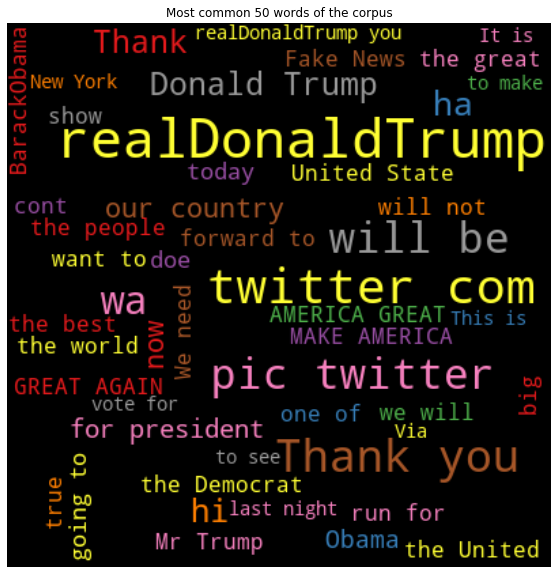

In [134]:
from matplotlib import pyplot as plt
%matplotlib inline

full_text = ' '.join(list(data_interim['text']))

generate_wordcloud(full_text, 'the corpus', 50)

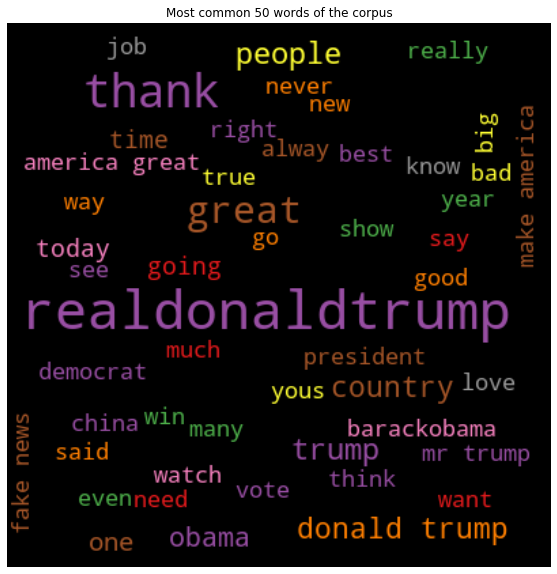

In [135]:
from matplotlib import pyplot as plt
%matplotlib inline

full_text = ' '.join(list(data['Updated']))

generate_wordcloud(full_text, 'the corpus', 50)

In [ ]:
print(full_text)

In [ ]:
data=['I','am','a','good', 'boy']
print(' '.join(data))

###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Types of Stemmer </span>
Porter stemmer: This stemming algorithm is an older one. It’s from the 1980s and its main concern is removing the common endings to words so that they can be resolved to a common form. It’s not too complex and development on it is frozen. Typically, it’s a nice starting basic stemmer, but it’s not really advised to use it for any production/complex application. Instead, it has its place in research as a nice, basic stemming algorithm that can guarantee reproducibility. It also is a very gentle stemming algorithm when compared to others.<br/>

Snowball stemmer: This algorithm is also known as the Porter2 stemming algorithm. It is almost universally accepted as better than the Porter stemmer, even being acknowledged as such by the individual who created the Porter stemmer. That being said, it is also more aggressive than the Porter stemmer. A lot of the things added to the Snowball stemmer were because of issues noticed with the Porter stemmer. There is about a 5% difference in the way that Snowball stems versus Porter.<br/>

Lancaster stemmer: Just for fun, the Lancaster stemming algorithm is another algorithm that you can use. This one is the most aggressive stemming algorithm of the bunch. However, if you use the stemmer in NLTK, you can add your own custom rules to this algorithm very easily. It’s a good choice for that. One complaint around this stemming algorithm though is that it sometimes is overly aggressive and can really transform words into strange stems. Just make sure it does what you want it to before you go with this option!

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer

In [ ]:
porter = PorterStemmer()
lancaster=LancasterStemmer()
snowball=SnowballStemmer("english")
#proide a word to be stemmed
print("Porter Stemmer")
print(porter.stem("coronaviruslockdown"))
print(porter.stem("trouble"))
print(porter.stem("troubling"))
print(porter.stem("living"))

print("Lancaster Stemmer")
print(lancaster.stem("swimming"))
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("living"))

print("Snowball Stemmer")
print(snowball.stem("swimming"))
print(snowball.stem("trouble"))
print(snowball.stem("troubling"))
print(snowball.stem("living"))


###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> More about Lemmatisation </span>

https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#comparingnltktextblobspacypatternandstanfordcorenlp